# Auto-graded section

The block below imports necessary packages. 

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns

In this part of the assignment, you will work with the Dow dataset and MNIST dataset. Both datasets are provided below.

In [32]:
# Dow Dataset
df = pd.read_excel('impurity_dataset-training.xlsx')

def is_real_and_finite(x):
    if not np.isreal(x):
        return False
    elif not np.isfinite(x):
        return False
    else:
        return True
    
all_data = df[df.columns[1:]].values
numeric_map = df[df.columns[1:]].applymap(is_real_and_finite)
real_rows = numeric_map.all(axis = 1).copy().values
X_dow = np.array(all_data[real_rows, :-5], dtype = 'float')
y_dow = np.array(all_data[real_rows, -3], dtype = 'float')
y = y_dow.reshape(-1, 1)

# MNIST Dataset
from sklearn.datasets import load_digits

digits = load_digits()

X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

## 1. Partial Least Squares (25 pts)

Partial least squares regression (PLS regression) is a supervised algorithm that finds **linear** combinations of features that maximize the covariance between features.

### 1a: Import `PLSRegression` (5 pts)

Import the `sklearn.cross_decomposition.PLSRegression` object.

In [33]:
########################################
# Start your code here
from sklearn.cross_decomposition import PLSRegression
########################################

In [36]:
assert PLSRegression.__init__

### 1b: Standardization (5 pts)

Standardize `X_dow` and save the resulting matrix to `X_scaled`.

In [37]:
########################################
# Start your code here
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X_dow)
########################################

In [38]:
assert np.isclose(X_scaled.mean(axis = 0), 0).all()
assert np.isclose(X_scaled.std(axis = 0), 1).all()

### 1c: PLS Regression (5 pts)

Declare a `PLSRegression` object `pls` with `n_components = 5`. Train `pls` with `X_scaled` and `y`. Report the $\mathrm{r^2}$ as `pls_r2`.

In [39]:
########################################
# Start your code here
pls = PLSRegression(n_components = 5)
pls.fit(X_scaled, y)
pls_r2 = pls.score(X_scaled, y)
########################################

In [40]:
assert pls.n_components == 5
assert np.isclose(pls_r2, 0.6533602447390862)

### 1d: Achieving $\mathrm{r^2}$ of 0.68 (7.5 pts)

Find the minimum `n_components` with which $\mathrm{r^2}$ is above 0.68 when `PLSRegression` is trained and tested on `X_scaled` and `y`. Report the number as `min_n_comp` and the corresponding $\mathrm{r^2}$ as `r2_n_comp`.

In [41]:
########################################
# Start your code here
n = 1
r2 = 0

while r2 < 0.68:
    n += 1
    
    pls = PLSRegression(n_components = n)
    pls.fit(X_scaled, y)
    r2 = pls.score(X_scaled, y)
    
min_n_comp = n
r2_n_comp = r2
########################################

In [42]:
assert np.isclose(min_n_comp * r2_n_comp, 5.455616652135625)

### 1e: Feature transformation (2.5 pts)

Transform the features and reduce the dimensionality to `min_n_comp`. Name the matrix of transformed features `X_pls`.

In [43]:
########################################
# Start your code here
pls = PLSRegression(n_components = min_n_comp)
pls.fit(X_scaled, y)

X_pls = pls.transform(X_scaled)
########################################

In [44]:
assert X_pls.shape[0] == 10297
assert X_pls.shape[1] == min_n_comp
assert np.isclose(np.linalg.norm(X_pls), 537.5375896752992)

## 2. Linear Discriminant Analysis (25 pts)

LDA finds a **linear** combination of features that separates two or more classes or labels.

### 2a: Import `LinearDiscriminantAnalysis` (7.5 pts)

Import the `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` object.

In [47]:
########################################
# Start your code here
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
########################################

In [48]:
assert LinearDiscriminantAnalysis.__init__

### 2b: LDA transformation (7.5 pts)

Come up with `X_lda` which is a matrix of transformed features from `X_mnist` using LDA. Do not change any parameter settings of the `LinearDiscriminantAnalysis` object.

In [49]:
########################################
# Start your code here
lda = LinearDiscriminantAnalysis()
lda.fit(X_mnist, y_mnist)
X_lda = lda.transform(X_mnist)
########################################

In [50]:
assert X_lda.shape[1] == 9
assert np.isclose(X_lda[0].sum(), -8.929053278244288)

### 2c: Apply k-Means (5 pts)

Apply k-means clustering with `KMeans(n_clusters=10, random_state=42)` to `X_lda`. Report the clustering result as `y_kmeans`.

In [53]:
########################################
# Start your code here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(X_lda)
########################################

In [54]:
assert np.bincount(y_kmeans)[0] == 189
assert np.bincount(y_kmeans)[-1] == 174

### 2d: Assigning labels (5 pts)

Define a function `assign_labels` that assigns a label to each cluster by using the most common label from the cluster. This step converts the clustering to a classification prediction. If the label **9** is most common in the cluster 1, all points belonging to that cluster should be labeled as 9. `assign_labels` takes the following arguments:

- y: the original labels (numpy array, default: `y_mnist`)
- y_hat: the clustering result (numpy array, default: `y_kmeans`)

This function should return a numpy array `y_predict` in which a label is assigned to each data point.

In [55]:
def assign_labels(y = y_mnist, y_hat = y_kmeans):
########################################
# Start your code here
    y_predict = np.zeros(y.shape, dtype = 'int')
    
    for i in range(10):
        collect_label = y[y_hat == i]
        count_label = np.bincount(collect_label)
        common_label = np.argmax(count_label)
        
        y_predict[y_hat == i] = common_label
########################################
    return y_predict

In [56]:
y_predict = assign_labels()

assert np.bincount(y_predict)[1] == 189
assert np.bincount(y_predict)[4] == 175

# Peer-graded section

In this part of the assignment, you will work with the perovskite dataset and MNIST dataset. Both datasets are provided below.

In [57]:
# Perovskite Dataset
perov = pd.read_csv('perovskite_data.csv')

# MNIST Dataset
from sklearn.datasets import load_digits

digits = load_digits()

X_mnist = np.array(digits.data)
y_mnist = np.array(digits.target)

## 1. One-hot Encoding

In this problem, you will play with the perovskite dataset.

### 1a: One-hot encoded features

Use the `X` column of the perovskite dataset (corresponding to the identity of the X ion in the $\mathrm{ABX_3}$ coumpound) and create a matrix of one-hot encoded features from `X`. Show the first 10 rows of the matrix.

In [58]:
X_onehot = pd.get_dummies(perov['X'])
X_onehot.head(10)

,Br,Cl,F,I,O
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,1
5,0,0,1,0,0
6,0,0,1,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,0,0,1,0,0


### 1b: Analyzing X ions

Print the sum over all rows for each feature.

In [59]:
print(X_onehot.sum(axis = 0))

Br     27
Cl     71
F      66
I      43
O     369
dtype: int64


Briefly describe how to interpret the result of the sum over all rows.

**Answer**

The sum over all rows will be the number of composites that contain the element as `X` in $\mathrm{ABX_3}$ formula.

### 1c: One-hot encoding and categorical variables

Consider a dataset consisting of a single categorical variable with a total of **N** datapoints and corresponding outputs, $y$. Assume that each datapoint has a unique category label such that there are **N** distinct categories. You apply one-hot encoding to create a new feature matrix $\bar{\bar{X}}$ and decide to fit a linear regression model:

$\vec{y}=\bar{\bar{X}}\vec{w}$

What will the optimal values of $\vec{w}$ be and the $\mathrm{r^2}$ be? You can use code, math, or a conceptual explanation to answer this question.

**Answer**

The optimal values of $\vec{w}$ will be $\vec{y}$. Applying one-hot encoding to **N** distinct categories with **N** datapoints will result in an **N x N** identity matrix in which case $\vec{w}$ will be identical to $\vec{y}$.

## 2. PCA vs. LDA

In this problem, you will play with the MNIST dataset. You will compare the performance of LDA with PCA by visualizing classfication results as a confustion matrix. You may find the `assign_labels` function from the Skill Check very useful for the following problems.

### 2a: PCA

Show a confusion matrix after going through the following steps:

- Apply PCA to the MNIST dataset and reduce the dimensionality to 9.
- Apply k-means clustering to the PCA transformed data with `n_clusters=10`.
- Assign a label to each cluster by using the most common label from the cluster.
- Create a confusion matrix that compares the original label vs. assigned label

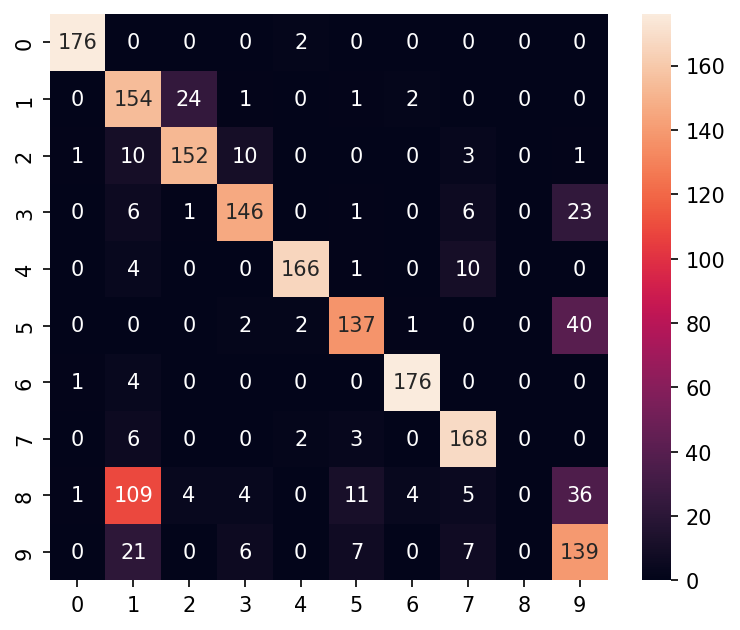

In [60]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components = 9)
X_pca = pca.fit_transform(X_mnist)

kmeans = KMeans(n_clusters = 10)
y_pca = kmeans.fit_predict(X_pca)

y_predict_pca = np.zeros(y_mnist.shape)

for i in range(10):
    collect_label = y_mnist[y_pca == i]
    count_label = np.bincount(collect_label)
    common_label = np.argmax(count_label)
    
    y_predict_pca[y_pca == i] = common_label
    
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_mnist, y_predict_pca)
fig, ax = plt.subplots(figsize = (6, 5), dpi = 150)
sns.heatmap(cm, annot = True, fmt = 'd', ax = ax);

### 2b: LDA

Show a confusion matrix by following the same steps above using LDA instead of PCA.

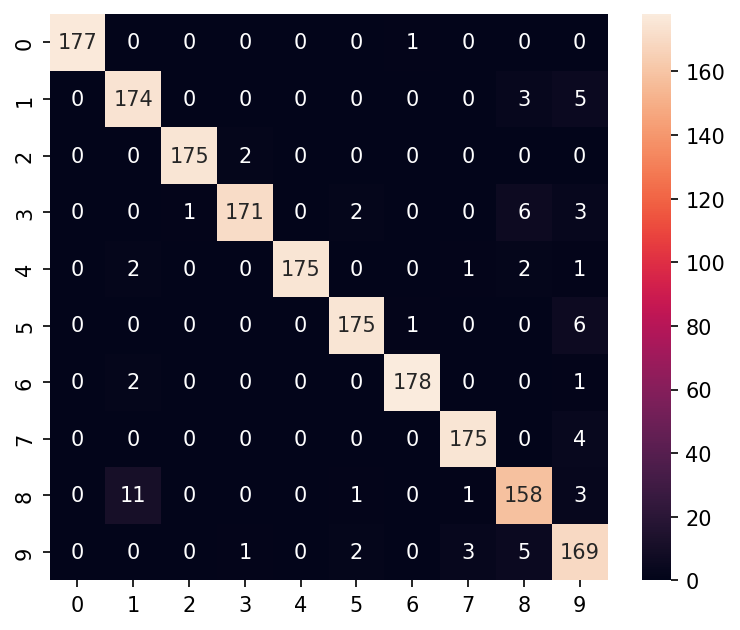

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_mnist, y_mnist)
X_lda = lda.transform(X_mnist)

kmeans = KMeans(n_clusters = 10)
y_lda = kmeans.fit_predict(X_lda)

y_predict_lda = np.zeros(y_mnist.shape)

for i in range(10):
    collect_label = y_mnist[y_lda == i]
    count_label = np.bincount(collect_label)
    common_label = np.argmax(count_label)
    
    y_predict_lda[y_lda == i] = common_label
    
fig, ax = plt.subplots(figsize = (6, 5), dpi = 150)
cm = confusion_matrix(y_mnist, y_predict_lda)
sns.heatmap(cm, annot = True, fmt = 'd', ax = ax);

### 2c: Discussion

Briefly discuss the results.

**Answer**

Clustering performs much better for the LDA-projected data as compared to the PCA-projected data. The PCA-projected data struggles identifying **1** and **9** and there are much less mispredictions for the LDA-projected data.